In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
ruta = 'data/patient_churn_dataset.csv'
data = pd.read_csv(ruta)
data.head()

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


In [82]:
data.describe()

,Age,Tenure_Months,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.856500,60.733500,7.614000,2.028000,366.130000,3.255000,3.289900,3.525900,3.736100,836.544000,0.078500,0.206000,1.483500,25.167400,0.683500
std,15.836487,35.111293,4.672143,1.699312,212.890277,1.008595,1.009062,0.871613,0.733748,589.031896,0.269024,0.404532,1.100151,13.948284,0.465227
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.500000,1.500000,2.000000,2.500000,20.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,41.000000,30.000000,4.000000,0.000000,180.000000,2.400000,2.400000,2.775000,3.100000,326.000000,0.000000,0.000000,1.000000,12.800000,0.000000
50%,54.000000,60.000000,8.000000,2.000000,363.000000,3.200000,3.300000,3.500000,3.800000,716.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,65.000000,92.250000,12.000000,3.000000,550.250000,4.100000,4.100000,4.300000,4.400000,1368.250000,0.000000,0.000000,2.000000,37.200000,1.000000
max,90.000000,120.000000,15.000000,5.000000,730.000000,5.000000,5.000000,5.000000,5.000000,1999.000000,1.000000,1.000000,3.000000,50.000000,1.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

### Variables categóricas

In [84]:
categoricas = data.select_dtypes(include = 'object').columns.to_list()
print(categoricas)

for cat in categoricas:
    if cat != 'PatientID':
        print(f'Categoria: {cat}')
        print(data[cat].value_counts())
        print('-'*40)

['PatientID', 'Gender', 'State', 'Specialty', 'Insurance_Type', 'Last_Interaction_Date']
Categoria: Gender
Gender
Male      1016
Female     984
Name: count, dtype: int64
----------------------------------------
Categoria: State
State
NC    259
IL    214
FL    213
PA    205
NY    197
OH    193
CA    184
GA    181
TX    180
MI    174
Name: count, dtype: int64
----------------------------------------
Categoria: Specialty
Specialty
General Practice     302
Family Medicine      289
Orthopedics          289
Neurology            286
Pediatrics           284
Internal Medicine    277
Cardiology           273
Name: count, dtype: int64
----------------------------------------
Categoria: Insurance_Type
Insurance_Type
Self-Pay    523
Medicare    516
Private     483
Medicaid    478
Name: count, dtype: int64
----------------------------------------
Categoria: Last_Interaction_Date
Last_Interaction_Date
2025-05-01    11
2025-04-18     8
2025-05-11     8
2025-08-21     8
2025-02-18     8
              

In [85]:
'''data['Last_Interaction_Date'] = pd.to_datetime(data['Last_Interaction_Date'])
data['Days_Since_Last_Interaction'] = (pd.to_datetime('today') - data['Last_Interaction_Date']).dt.days
data.drop(columns=['PatientID', 'Last_Interaction_Date'], inplace=True)
data.info()'''

"data['Last_Interaction_Date'] = pd.to_datetime(data['Last_Interaction_Date'])\ndata['Days_Since_Last_Interaction'] = (pd.to_datetime('today') - data['Last_Interaction_Date']).dt.days\ndata.drop(columns=['PatientID', 'Last_Interaction_Date'], inplace=True)\ndata.info()"

In [86]:
eliminar_categoricas = ['PatientID', 'Last_Interaction_Date']
data.drop(columns = eliminar_categoricas, inplace=True)
data.head()

,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,65,Male,FL,118,General Practice,Private,10,3,135,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,18,Female,CA,70,Cardiology,Medicaid,5,4,696,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


### Variables numéricas

In [87]:
# Feature engineering

data['frecuencia_visitas'] = data['Visits_Last_Year'] / 12
data['ratio_citas_perdidas'] = data['Missed_Appointments'] / data['Visits_Last_Year']
data['costoxvisita'] = data['Avg_Out_Of_Pocket_Cost'] / data['Visits_Last_Year']    

eliminar_numericas = ['Visits_Last_Year', 'Missed_Appointments', 'Avg_Out_Of_Pocket_Cost']    
data.drop(columns = eliminar_numericas, inplace = True)

In [88]:
numericas = data.select_dtypes(include = 'number').columns.to_list()
numericas_ordenadas = numericas.copy()
numericas_ordenadas.remove('Churned')
numericas_ordenadas.append('Churned')   

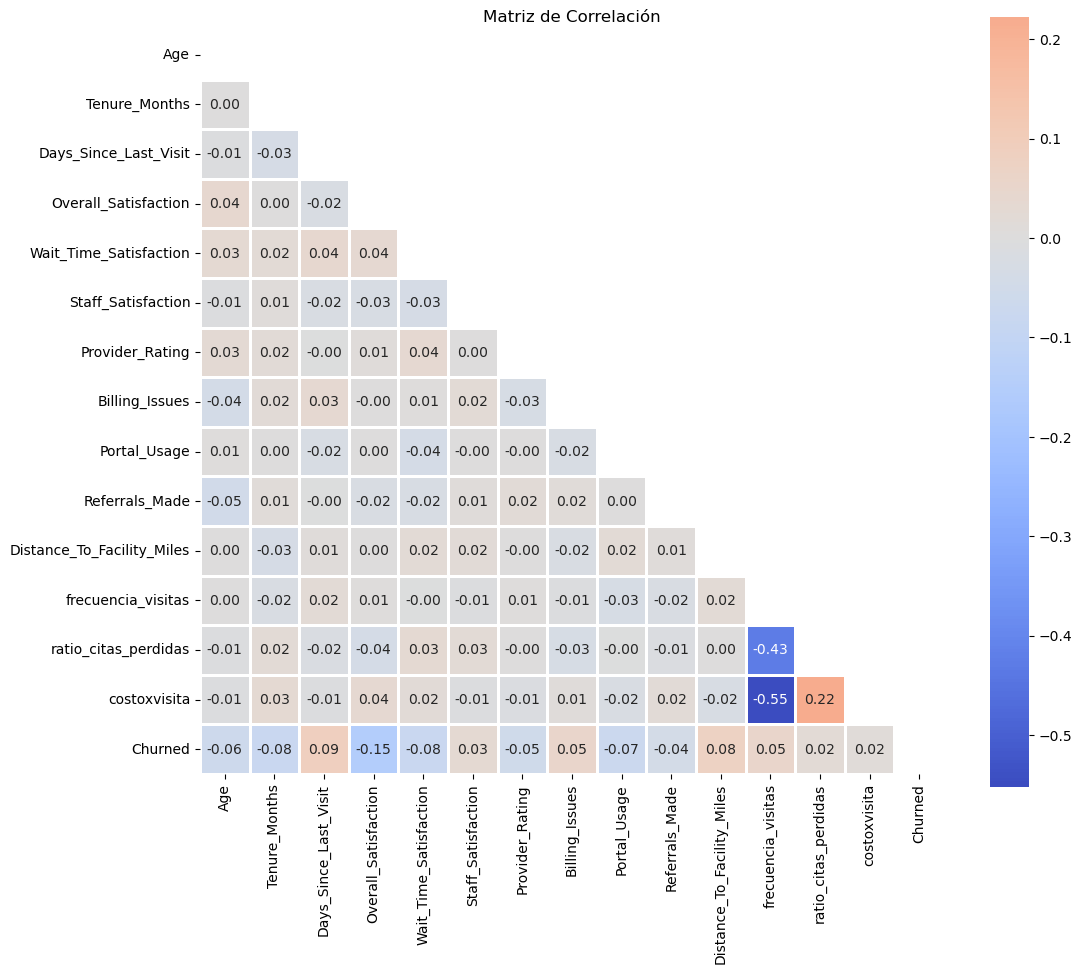

In [ ]:
corr_matrix = data[numericas_ordenadas].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, edgecolor='white', linewidths=0.9)
plt.title('Matriz de Correlación')
plt.show()

# Cuando la frecuencia de visitas sube, el costoxvisita baja porque van a citas mas baratas
# Cuando la frecuencia de visitas sube, el ratio de citas perdidas baja 
# Cuando la edad sube, el churned baja, lo que sugiere que los pacientes mayores son menos propensos a abandonar el servicio
# Cuando el overall_satisfaction sube el churned baja, lo que indica que los pacientes más satisfechos tienen menos probabilidades de abandonar el servicio

Imbalance ratio: 2.1596


<Axes: title={'center': 'Cardinalidad'}, xlabel='Churned'>

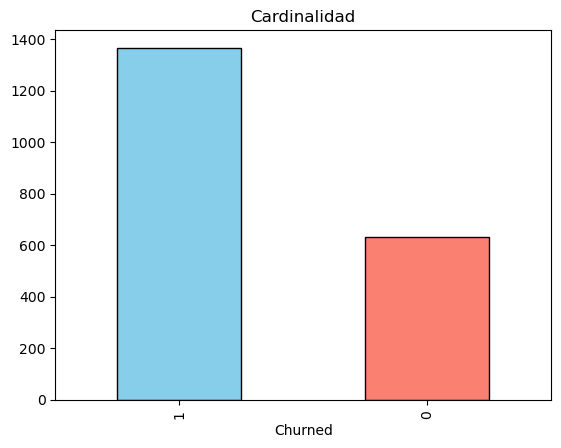

In [101]:
min = data['Churned'].value_counts().min()
max = data['Churned'].value_counts().max()
print(f'Imbalance ratio: {np.round((max / min), 4)}')

data['Churned'].value_counts().plot(title= 'Cardinalidad', kind='bar', color=['skyblue', 'salmon'], edgecolor='black')